In [53]:
from sklearn.datasets import load_breast_cancer 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier        
from sklearn.ensemble import RandomForestClassifier    
from sklearn.svm import SVC                            
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
import matplotlib.pylab as plt
import numpy as np
import graphviz
import seaborn as sns
import pandas as pd
%matplotlib inline

In [54]:
# Kullanacağımız göğüs kanseri veri setini kanser değişkenine atayalım. 
kanser = load_breast_cancer()
print(kanser.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [55]:
print(kanser.feature_names) #veri setimizde hangi özellik bilgilerini olduğunu görüntüleyelim.

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [56]:
print(kanser.target_names) #veri setimizde istediğimiz belirli olan sonuç değerlerini görüntüleyelim.

['malignant' 'benign']


In [57]:
kanser.data.shape #veri setimizin hangi boyutta bir matris olduğunu görüntüleyelim.

(569, 30)

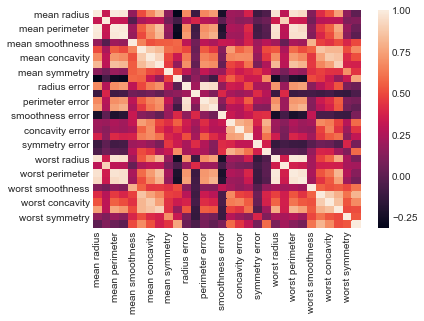

In [58]:
#Veri setimizdeki sütunların hangisinin daha ağırlıklı etkisi olduğunu görmek için ısı haritasında görüntüleyelim
veri_kanser = pd.DataFrame(kanser.data, columns= kanser.feature_names)


sns.heatmap(veri_kanser.corr())
sns.set_style("whitegrid")
plt.show()

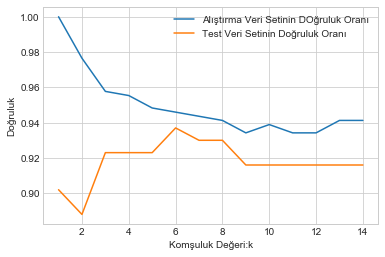

In [59]:
#------------------KNN Classifier------------------#
#Veri setimiz üzerinde KNN Classification metodunu uygulamak için öncelikle alıştırma ve test verilerini ayırmak için
#train_test_split metodunu kullanalım.

x_alistirma, x_test, y_alistirma, y_test = train_test_split(kanser.data ,kanser.target, stratify = kanser.target,
                                                           random_state = 66)

#Not: stratify metodu vesilesiyle kanser.target içerisindeki malignant ile benign arasındaki oran ne ise öğrenme
#verimizi bu orana göre hesaplamasını istiyoruz.

alistirma_dogruluk_orani = []
test_dogruluk_orani = []


k_degeri = range(1,15)
#her iki listeyi de split metodunu kullandıktan sonra KNN metodunu kullanırken hangi K değerinin kullanmamız
#gerektiğini tespit etmek için bir for döngüsü oluşturuyoruz.

for k in k_degeri:
    knn =KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_alistirma,y_alistirma)
    alistirma_dogruluk_orani.append(knn.score(x_alistirma,y_alistirma))
    test_dogruluk_orani.append(knn.score(x_test,y_test))
    
#Grafik üzerinden k değerini belirlemek için yardım alalım.

plt.plot(k_degeri,alistirma_dogruluk_orani, label="Alıştırma Veri Setinin Doğruluk Oranı")
plt.plot(k_degeri,test_dogruluk_orani, label="Test Veri Setinin Doğruluk Oranı")
plt.ylabel("Doğruluk")
plt.xlabel("Komşuluk Değeri:k")
plt.legend()

#k değeri için en iyi değerin 6 olduğunu grafikten öğreniyoruz.

In [60]:
#K değişkenine karar verdikten sonra elimizdeki veri setinin KNN teoremine görev doğruluk oran hesaplamasını yazıyoruz.
print("6NN için eğitim setinin doğruluk oranı: {:3f}".format(alistirma_dogruluk_orani[5]))
print("6NN için test setinin doğruluk oranı: {:3f}".format(test_dogruluk_orani[5]))

6NN için eğitim setinin doğruluk oranı: 0.946009
6NN için test setinin doğruluk oranı: 0.937063


In [61]:
#------------------Logistic Regression------------------#
#Veri setimiz üzerinde Logistic Regression metodunu uygulamak için öncelikle alıştırma ve test verilerini ayırmak için
#yine train_test_split metodunu kullanalım.
x_alistirma, x_test, y_alistirma, y_test = train_test_split(kanser.data, kanser.target, stratify=kanser.target,
                                                            random_state=42)
log_reg = LogisticRegression()
log_reg.fit(x_alistirma, y_alistirma)

print('Eğitim setinin doğruluk oranı: {:.3f}'.format(log_reg.score(x_alistirma,y_alistirma)))
print('Test setinin doğruluk oranı: {:.3f}'.format(log_reg.score(x_test,y_test)))

#Logistic Regression metodu bu veri setinde KNN metodunda daha iyi sonuçlar vermektedir.

Eğitim setinin doğruluk oranı: 0.953
Eğitim setinin doğruluk oranı: 0.958


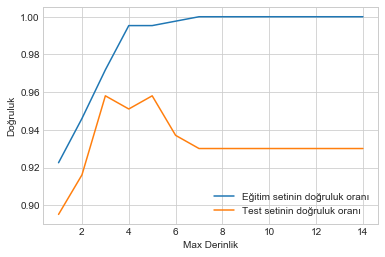

In [79]:
#------------------Decision Tree------------------#
x_alistirma, x_test, y_alistirma, y_test = train_test_split(kanser.data, kanser.target, random_state=42)

alistirma_dogruluk_orani = []
test_dogruluk_orani = []

max_dep = range(1,15)

for md in max_dep:
    tree = DecisionTreeClassifier(max_depth=md,random_state=0)
    tree.fit(x_alistirma,y_alistirma)
    alistirma_dogruluk_orani.append(tree.score(x_alistirma, y_alistirma))
    test_dogruluk_orani.append(tree.score(x_test, y_test))
 
plt.plot(max_dep,alistirma_dogruluk_orani, label='Eğitim setinin doğruluk oranı')
plt.plot(max_dep,test_dogruluk_orani, label='Test setinin doğruluk oranı')
plt.ylabel('Doğruluk')
plt.xlabel('Max Derinlik')
plt.legend()

#Max_depth değeri 5'in üzerinde seçtiğimizde veri setindeki training data "overfit" oluyor. Dolayısıyla, test veri
#setindeki doğruluk oranımız da max_depth değeri arttıkça düşmüş oluyor. 
#bu veri seti için en iyi değerin max_depth'in 3 olduğu zamanda elde edilebildiğini görüyoruz.

In [63]:
export_graphviz(tree, out_file='cancerTree.dot', class_names=['malignant','benign'], 
                feature_names=kanser.feature_names, impurity=False, filled=True)

In [64]:
print('Feature importances: {}'.format(tree.feature_importances_))
type(tree.feature_importances_)

Feature importances: [ 0.          0.          0.          0.          0.          0.          0.
  0.72468105  0.          0.          0.01277192  0.          0.          0.
  0.00826156  0.          0.          0.01702539  0.          0.
  0.05899273  0.12550655  0.00838371  0.03452044  0.00985664  0.          0.
  0.          0.          0.        ]


numpy.ndarray

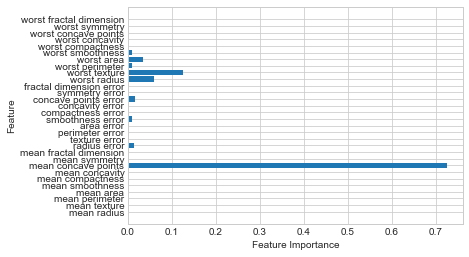

In [82]:
#Feature Önemi
n_feature = kanser.data.shape[1]
plt.barh(range(n_feature), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_feature), kanser.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [81]:
# Decision Tree iyi bir sonuç veriyor olmasına rağmen kolayca overfit özelliği gösterebiliyor.

In [31]:
#------------------Random Forest------------------#

X_train, X_test, y_train, y_test = train_test_split(kanser.data, kanser.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train,y_train)

print('acc for training data: {:.3f}'.format(forest.score(X_train,y_train)))
print('acc for test data: {:.3f}'.format(forest.score(X_test,y_test)))

acc for training data: 1.000
acc for test data: 0.972


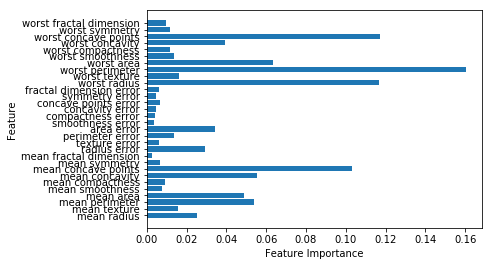

In [32]:
#Feature Importance
n_feature = kanser.data.shape[1]
plt.barh(range(n_feature), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_feature), kanser.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [33]:
# Random Forest perform well and we don't need to standardize features
# Better than DT because of randomization
# It may not work well with sparse data

In [35]:
# --------- SVM (Support Vector Machine)
X_train, X_test, y_train, y_test = train_test_split(kanser.data, kanser.target, random_state=0)

svm= SVC()
svm.fit(X_train, y_train)

print('acc on train dataset: {:.3f}'.format(svm.score(X_train,y_train)))
print('acc on test dataset: {:.3f}'.format(svm.score(X_test,y_test)))

acc on train dataset: 1.000
acc on test dataset: 0.629


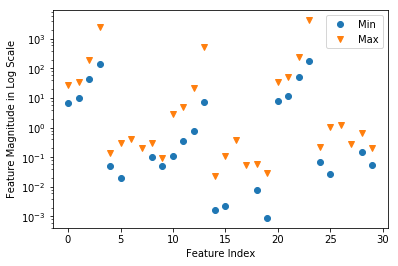

In [36]:
#it mean we overfit into our train dataset
# we can change hyper parameter to improve the model
# one way it to apply scaling
plt.plot(X_train.min(axis=0), 'o', label='Min')
plt.plot(X_train.max(axis=0), 'v', label='Max')
plt.xlabel('Feature Index')
plt.ylabel('Feature Magnitude in Log Scale')
plt.yscale('log')
plt.legend(loc='upper right')

In [38]:
# We can see that there are huge diffrence between min and max and between diffrent features

In [39]:
min_train = X_train.min(axis=0)
range_train = (X_train - min_train).max(axis=0)

X_train_scaled = (X_train - min_train)/range_train
X_test_scaled = (X_test - min_train)/range_train

print('Min per feature\n{}'.format(X_train_scaled.min(axis=0)))
print('Max per feature\n{}'.format(X_train_scaled.max(axis=0)))

Min per feature
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Max per feature
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [40]:
svm = SVC()
svm.fit(X_train_scaled, y_train)
print('acc on train dataset: {:.3f}'.format(svm.score(X_train_scaled,y_train)))
print('acc on test dataset: {:.3f}'.format(svm.score(X_test_scaled,y_test)))

acc on train dataset: 0.948
acc on test dataset: 0.951


In [41]:
# we did much better now, but now we are underfitting
# to fix it we need change hyper parameters

In [42]:
svm = SVC(C=1000)
svm.fit(X_train_scaled, y_train)
print('acc on train dataset: {:.3f}'.format(svm.score(X_train_scaled,y_train)))
print('acc on test dataset: {:.3f}'.format(svm.score(X_test_scaled,y_test)))

acc on train dataset: 0.988
acc on test dataset: 0.972


In [43]:
# For SVM:
# can work well on high dimensional data with smaller sample size
# but don't perform well on high dim with lots of sample (>100K)
# DT or RF can be better choice, because they require less/no preprocessing of data, easier to understand and visualize